<a href="https://colab.research.google.com/github/sidh26/ANN/blob/main/classwork/ANN%203rd%20Apr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

## Air Passengers Data

In [4]:
ts = pd.read_csv('/content/AirPassengers.csv')
ts.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
ts['Month'] = pd.to_datetime(ts['Month'], format='%Y-%m')
ts.set_index(['Month'], drop=True, inplace=True)
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


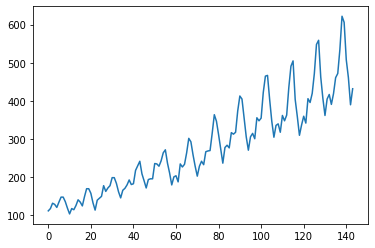

In [ ]:
ts['#Passengers'].plot()

In [ ]:
from statsmodels.tsa.stattools import  adfuller
s_test = adfuller(ts['#Passengers'], autolag='AIC')

In [ ]:
s_test

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [ ]:
test_output = pd.Series(s_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of obs'])
test_output

Test Statistic      0.815369
p-value             0.991880
#Lags Used         13.000000
Number of obs     130.000000
dtype: float64

In [ ]:
for key, value in s_test[4].items():
    print(f'Critical Value ({key}) is {value}')

Critical Value (1%) is -3.4816817173418295
Critical Value (5%) is -2.8840418343195267
Critical Value (10%) is -2.578770059171598


## Sunspots Data

In [ ]:
ss = pd.read_csv('/content/monthly-sunspots.csv')
ss.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [ ]:
ss['Month'] = pd.to_datetime(ss['Month'], format='%Y-%m')
ss.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


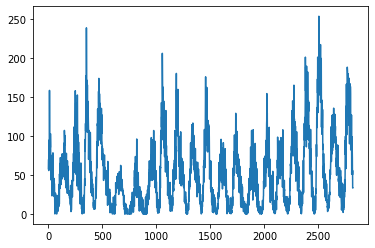

In [ ]:
ss['Sunspots'].plot()

In [ ]:
from statsmodels.tsa.stattools import  adfuller
s_test = adfuller(ss['Sunspots'], autolag='AIC')

In [ ]:
test_output = pd.Series(s_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of obs'])
test_output

Test Statistic   -9.567668e+00
p-value           2.333452e-16
#Lags Used        2.700000e+01
Number of obs     2.792000e+03
dtype: float64

In [ ]:
for key, value in s_test[4].items():
    print(f'Critical Value ({key}) is {value}')

Critical Value (1%) is -3.432694313168895
Critical Value (5%) is -2.862575752726396
Critical Value (10%) is -2.5673213632123297


## Make Series Stationary

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


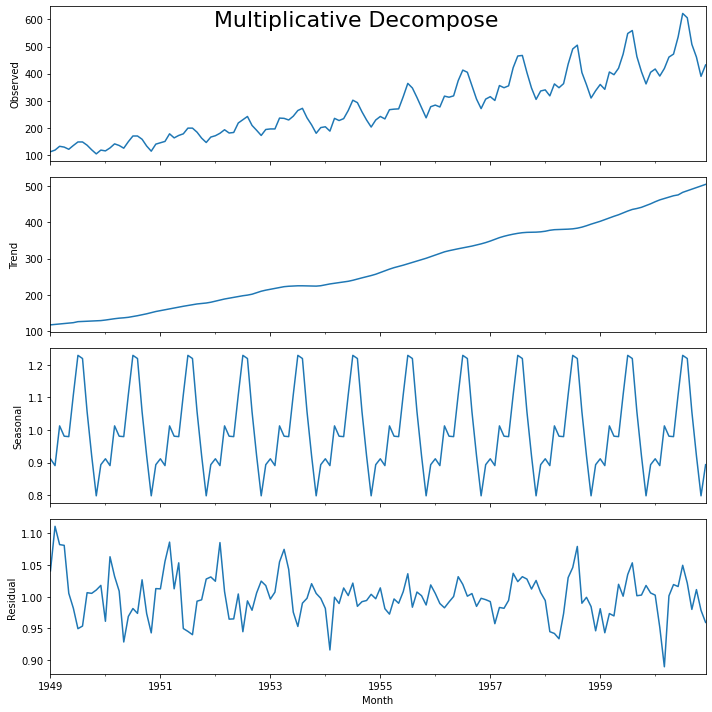

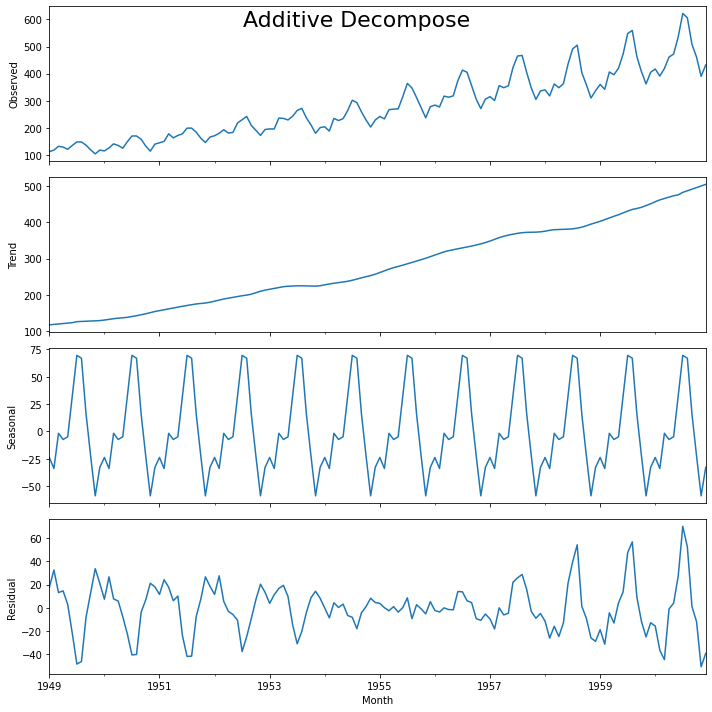

In [ ]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(ts['#Passengers'], model='multiplicative', extrapolate_trend=12)

# Additive Decomposition
result_add = seasonal_decompose(ts['#Passengers'], model='additive', extrapolate_trend=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## Differencing

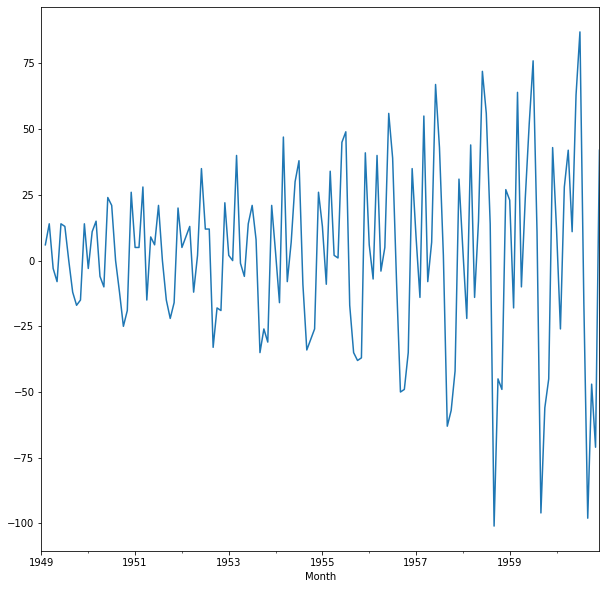

In [ ]:
# Y(t) = y(t) - y(t-1)

ts['#Passengers_diff'] = ts['#Passengers'] - ts['#Passengers'].shift(1)
ts['#Passengers_diff'].plot()

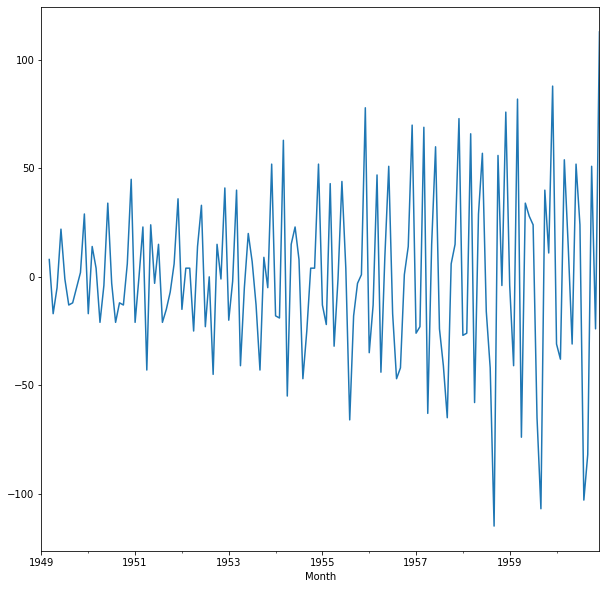

In [ ]:
ts['#Passengers_diff2'] = ts['#Passengers_diff'] - ts['#Passengers_diff'].shift(1)
ts['#Passengers_diff2'].plot()

In [ ]:
from statsmodels.tsa.stattools import  adfuller
s_test = adfuller(ts['#Passengers_diff'].dropna(), autolag='AIC')

In [ ]:
test_output = pd.Series(s_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of obs'])
test_output

Test Statistic     -2.829267
p-value             0.054213
#Lags Used         12.000000
Number of obs     130.000000
dtype: float64

In [ ]:
for key, value in s_test[4].items():
    print(f'Critical Value ({key}) is {value}')

Critical Value (1%) is -3.4816817173418295
Critical Value (5%) is -2.8840418343195267
Critical Value (10%) is -2.578770059171598


## Seasonal Differencing

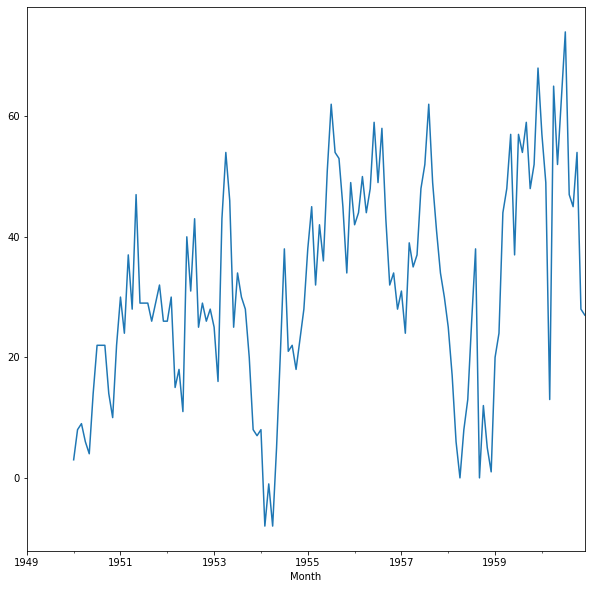

In [ ]:
# For places where there is no trend, use this
# Y(t) = y(t) - y(t-k), k=seasonality

ts['#Passengers_sea_diff12'] = ts['#Passengers'] - ts['#Passengers'].shift(12)
ts['#Passengers_sea_diff12'].plot()

## Transformations

### Log

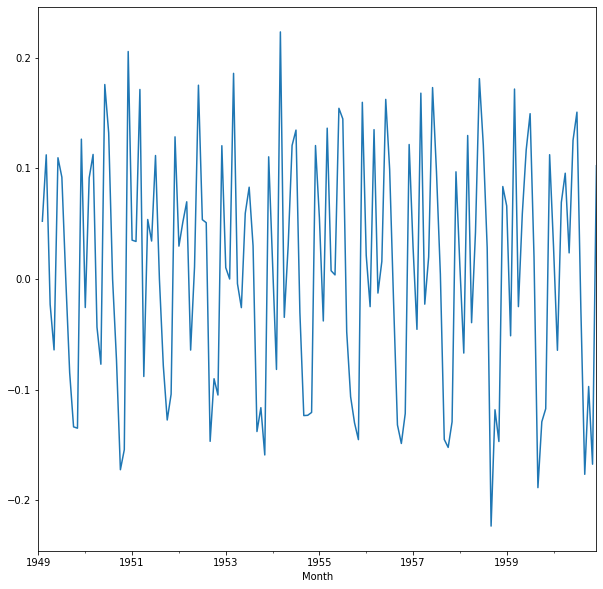

In [ ]:
import numpy as np

ts['#Passengers_log'] = np.log(ts['#Passengers'])
ts['#Passengers_log_diff'] = ts['#Passengers_log'] - ts['#Passengers_log'].shift(1)
ts['#Passengers_log_diff'].plot()

### SQRT

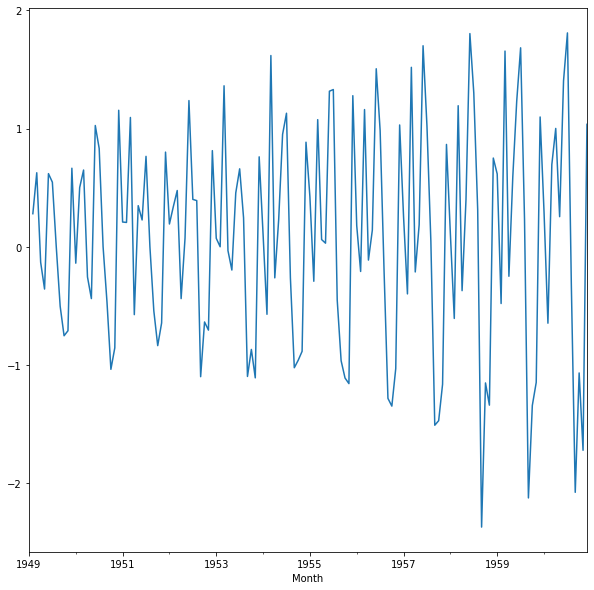

In [ ]:
import numpy as np

ts['#Passengers_sqrt'] = np.sqrt(ts['#Passengers'])
ts['#Passengers_sqrt_diff'] = ts['#Passengers_sqrt'] - ts['#Passengers_sqrt'].shift(1)
ts['#Passengers_sqrt_diff'].plot()

## Detrending
Ways to detrend:
- subtract line of best fit
- subtract trend component from seasonal decompose
- subtract mean

### Subtract line of best fit

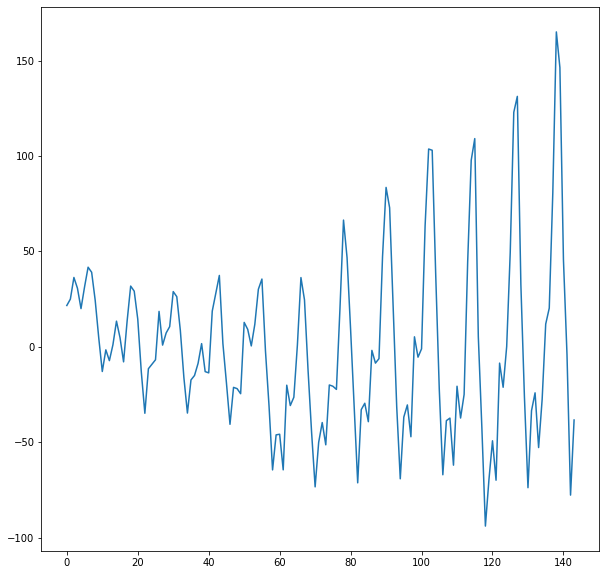

In [ ]:
from scipy import signal

ts_bestfit_detrended = signal.detrend(ts['#Passengers'])
plt.plot(ts_bestfit_detrended)

### Subtract trend component from seasonal decompose

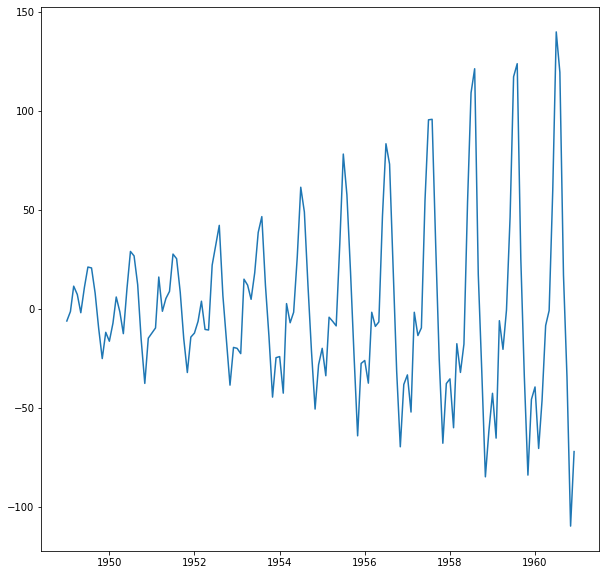

In [ ]:
# seasonal decompose
result_add = seasonal_decompose(ts['#Passengers'], model='additive', extrapolate_trend=12)

# subtract trend from original
ts_sea_detrended = ts['#Passengers'] - result_add.trend

# plot
plt.plot(ts_sea_detrended)

### Subtract the mean

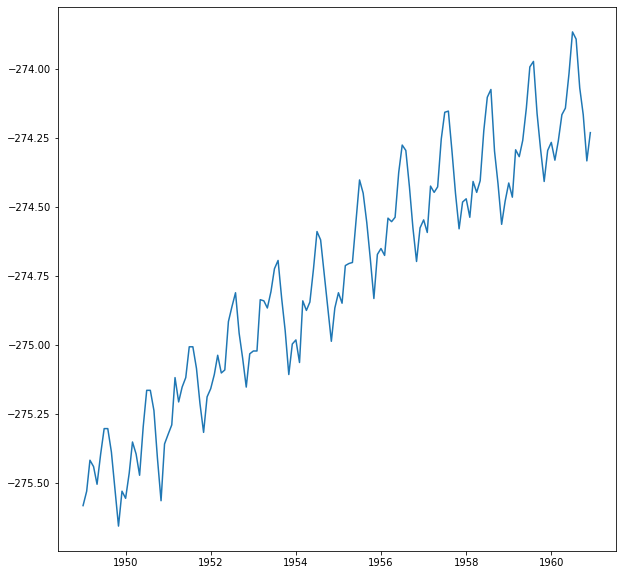

In [ ]:
import numpy as np

ts['#Passengers_mean'] = np.mean(ts['#Passengers'])
ts_mean_detrended = ts['#Passengers_log'] - ts['#Passengers_mean']
plt.plot(ts_mean_detrended)

## Deseasonalize
Ways to deseasonalize:
- Take moving average with length as the seasonal window. This will smoothen the series in the process
- Seasonal difference the series (subtract the value of previous season from the current value)
- Divide the series by the seasonal index obtained from STL decomposition

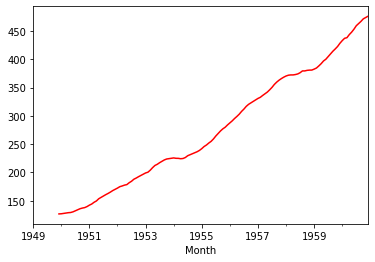

In [6]:
rolling = ts['#Passengers'].rolling(window=12)
rolling_mean = rolling.mean()
rolling_mean.plot(color='red')

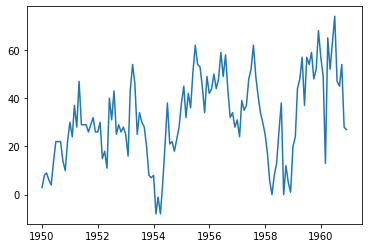

In [9]:
ts_deseasonalize2 = ts['#Passengers'] - ts['#Passengers'].shift(12)
plt.plot(ts_deseasonalize2)

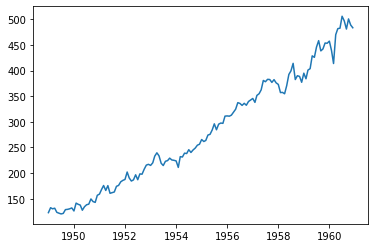

In [14]:
result_mul = seasonal_decompose(ts['#Passengers'], model='multiplicative', extrapolate_trend=12)
ts_deseasonalize3 = ts['#Passengers'] / result_mul.seasonal
plt.plot(ts_deseasonalize3)